# Portfolio with the Maximum Calmar Ratio for the Media Sector 

In [1]:
from pandas_datareader import data
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Establishing Dates
start = "2017-01-01"
end = "2021-1-1"

# Establishing Assets
assets = ['ZEEL.NS', 'PVR.NS', 'SUNTV.NS', 'SAREGAMA.NS', 'TV18BRDCST.NS',
         'INOXLEISUR.NS', 'DISHTV.NS', 'NETWORK18.NS', 'HATHWAY.NS']



#252 trading days in a year
N = 252

#1% risk free rate
rf =0.02

# Creating an empty dataframe
df_prices = pd.DataFrame()

# Getting the "Adj Close" data from Yahoo Finance by defining a function
# This function lists the price data as daily percent change 
def YahooData(dataframe, assets_list, start_date, end_date):
    for i in assets_list:
        dataframe[i] = data.DataReader(i, data_source = "yahoo", start=start_date, end=end_date)['Adj Close']
    return dataframe

# Running the function that we just made and saving the results to the DataFrame
df = YahooData(df_prices, assets, start, end)

# Calculating Log Return
df = np.log(df/df.shift(1))

# Dropping the first row because it's N/A
df = df.dropna()

# Viewing df head
df

ZEEL.NS    PVR.NS  SUNTV.NS  SAREGAMA.NS  TV18BRDCST.NS  \
Date                                                                   
2017-01-03  0.014727  0.012728  0.042829     0.031863       0.010796   
2017-01-04  0.000654  0.003284  0.000669     0.035398       0.005355   
2017-01-05  0.026043  0.010169  0.015812    -0.002795       0.014579   
2017-01-06 -0.016278 -0.005368 -0.000376    -0.016497       0.000000   
2017-01-09  0.004309  0.002920  0.013257    -0.022577      -0.002635   
...              ...       ...       ...          ...            ...   
2020-12-28  0.013030  0.023629  0.012717     0.085830       0.011173   
2020-12-29 -0.009126 -0.009508 -0.010243     0.008081      -0.014389   
2020-12-30  0.004573 -0.006182 -0.010661     0.001167       0.000000   
2020-12-31  0.019655  0.023141  0.000520     0.025028      -0.004843   
2021-01-01  0.006467  0.015148 -0.004900    -0.005281       0.006452   

            INOXLEISUR.NS  DISHTV.NS  NETWORK18.NS  HATHWAY.NS  
Date                                                            
2017-01-03       0.014655   0.007051      0.017519    0.022100  
2017-01-04      -0.015959  -0.007051      0.017217    0.006807  
2017-01-05       0.001086   0.017534      0.014125   -0.009543  
2017-01-06      -0.008943  -0.003482     -0.015548   -0.030600  
2017-01-09       0.006552   0.005219      0.000000    0.019581  
...                   ...        ...           ...         ...  
2020-12-28       0.016939  -0.059354     -0.001365   -0.011940  
2020-12-29      -0.006385  -0.078545     -0.012371   -0.015129  
2020-12-30      -0.000890   0.038173      0.000000   -0.003053  
2020-12-31       0.005506   0.003738     -0.006940    0.013668  
2021-01-01       0.015989   0.000000      0.016575   -0.003021  

[988 rows x 9 columns]

In [3]:
# Creating 10000 random simulations of each portfolio weight configuration
num_runs = 10000 # number of rows/iterations

# Creating a Matrix with 10000 rows, with each row representing a random portfolio:
    #first 3 columns are Mean Returns, Standard Deviation, and Sortino Ratio
    # remaining columns are each assets random weight within that random portfolio
result = np.zeros((num_runs,(len(assets)+3)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
df = df.copy()

for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(assets))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    ### daily return of the portfolio based on a given set of weights
    df['portfolio_ret'] = df.iloc[:,0]*weights[0]+df.iloc[:,1]*weights[1]+df.iloc[:,2]*weights[2]
  
                       
    # Calculating mean
    E = df['portfolio_ret'].mean()
    
    
    # Annualizing mean
    E = E*252
    

    
    # Calculating Drawdown
    def max_drawdown(return_series):
        comp_ret = (return_series+1).cumprod()
        peak = comp_ret.expanding(min_periods=1).max()
        dd = 1 - (comp_ret/peak)
        return dd.max()

    max_drawdown = max_drawdown(df['portfolio_ret'])
   
    #Calculating Annualised Calmar
    Calmar = E / max_drawdown
    
                   
    # Populating the 'result' array with the required values: Mean, Drawdown, Calmar followed by the weights                   
    result[i,0] = E
    result[i,1] = max_drawdown
    result[i,2] = Calmar
    
    for j in range(len(assets)):
        result[i,j+3]= weights[j]

In [5]:
# Converting 'result' into a DataFrame

columns = ['Mean','Drawdown', 'Calmar'] + assets

result = pd.DataFrame(result,columns=columns)
result

Mean  Drawdown    Calmar   ZEEL.NS    PVR.NS  SUNTV.NS  SAREGAMA.NS  \
0     0.006621  0.277438  0.023865  0.012368  0.144774  0.181478     0.127854   
1     0.004783  0.243239  0.019662  0.029552  0.222148  0.062762     0.022005   
2    -0.006836  0.309887 -0.022060  0.085464  0.145207  0.127621     0.154999   
3     0.003434  0.243870  0.014083  0.014621  0.080491  0.166819     0.046998   
4    -0.000117  0.316613 -0.000369  0.057993  0.185731  0.150491     0.127710   
...        ...       ...       ...       ...       ...       ...          ...   
9995 -0.007196  0.274011 -0.026263  0.065840  0.043160  0.147012     0.092039   
9996 -0.027494  0.399311 -0.068854  0.176846  0.009287  0.156954     0.160920   
9997 -0.023633  0.413456 -0.057160  0.186960  0.168508  0.112628     0.010515   
9998 -0.035359  0.373974 -0.094548  0.215026  0.010355  0.076112     0.195669   
9999 -0.004687  0.268981 -0.017426  0.072431  0.159589  0.087134     0.171118   

      TV18BRDCST.NS  INOXLEISUR.NS  DISHTV.NS  NETWORK18.NS  HATHWAY.NS  
0          0.124467       0.128818   0.032706      0.139315    0.108220  
1          0.126636       0.197404   0.038326      0.191875    0.109292  
2          0.122136       0.094111   0.138825      0.021437    0.110201  
3          0.094381       0.158795   0.157401      0.127044    0.153449  
4          0.088731       0.056945   0.095295      0.055256    0.181847  
...             ...            ...        ...           ...         ...  
9995       0.053101       0.201146   0.122530      0.080183    0.194989  
9996       0.078890       0.064141   0.029987      0.239956    0.083020  
9997       0.162035       0.033581   0.142072      0.030107    0.153593  
9998       0.036402       0.048621   0.195662      0.169121    0.053033  
9999       0.013689       0.111565   0.153424      0.118495    0.112554  

[10000 rows x 12 columns]

In [6]:
Max_Calmar = result.iloc[result['Calmar'].idxmax()]
Max_Calmar

Mean             0.015748
Drawdown         0.341187
Calmar           0.046156
ZEEL.NS          0.000988
PVR.NS           0.366518
SUNTV.NS         0.081195
SAREGAMA.NS      0.053721
TV18BRDCST.NS    0.195502
INOXLEISUR.NS    0.087267
DISHTV.NS        0.093716
NETWORK18.NS     0.007844
HATHWAY.NS       0.113249
Name: 4087, dtype: float64

In [7]:
Min_Drawdown = result.iloc[result['Drawdown'].idxmin()]
Min_Drawdown

Mean            -0.001728
Drawdown         0.030432
Calmar          -0.056775
ZEEL.NS          0.012146
PVR.NS           0.006182
SUNTV.NS         0.007147
SAREGAMA.NS      0.216820
TV18BRDCST.NS    0.213791
INOXLEISUR.NS    0.003471
DISHTV.NS        0.153939
NETWORK18.NS     0.219717
HATHWAY.NS       0.166786
Name: 8265, dtype: float64

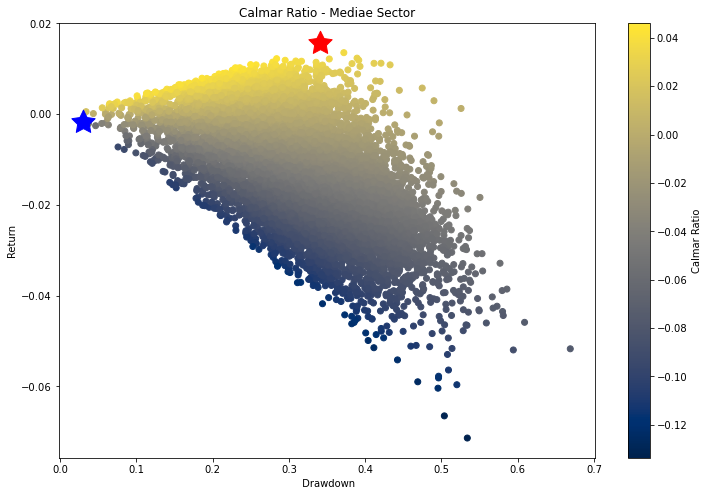

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(x=result['Drawdown'],y=result['Mean'],c=result['Calmar'],cmap='cividis')
plt.colorbar(label='Calmar Ratio')
plt.xlabel(' Drawdown')
plt.ylabel('Return')

plt.title('Calmar Ratio - Mediae Sector')
#Plot a red star to highlight position of the portfolio with highest Sortino Ratio
plt.scatter(Max_Calmar[1],Max_Calmar[0],marker=(5,1,0),color='r',s=600)

#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(Min_Drawdown[1],Min_Drawdown[0],marker=(5,1,0),color='b',s=600)
plt.show()